# Analysis Notebook

## Package imports and configurations

In [52]:
# imports
import os

from pathlib import Path

import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

from rich import print
from tqdm import tqdm

In [53]:
# matplotlib configuration
cstyle_url = r"https://gist.githubusercontent.com/CalvinSprouse/30bba681da1dd0023e948ca207fad0fc/raw/80a1ae94031873a57c9624103e83f5caf175ac86/cstyle.mplstyle"
plt.style.use(["default", cstyle_url])

# configure figure directory
figure_dir = Path(".figures")
if not figure_dir.exists(): figure_dir.mkdir()

## Data loading and initial processing

In [77]:
# define the location of data files
mat_file = Path("growth_cone_mts_longL.mat")

# load data into dataframes / arrays
mat_data = sp.io.loadmat(mat_file)

## Analysis

### Recreate steady state figure

Line to recreate:

`plot(x, v, 'm', x, Fmyo, 'w--', x, T, 'r', LineWidth=2);`

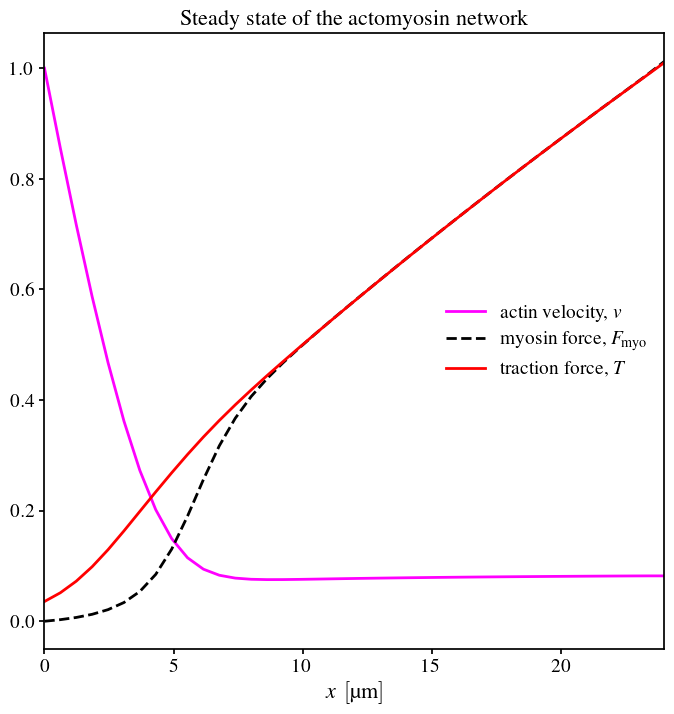

In [78]:
# load data from mat_data object
x_array = np.array(mat_data.get("x"))[0]
v_array = np.array(mat_data.get("v"))[0]
Fmyo_array = np.array(mat_data.get("Fmyo"))[0]
T_array = np.array(mat_data.get("T"))[0]

# make plot using matplotlib
# matlab code to replicate: plot(x, v, 'm', x, Fmyo, 'w--', x, T, 'r', LineWidth=2);
fig, ax = plt.subplots()

# plot points
# plot actin velocity distribution
ax.plot(
    x_array,
    v_array,
    color="magenta",
    linewidth=2,
    label=r"actin velocity, $v$",
)
# plot myosin force distribution
ax.plot(
    x_array,
    Fmyo_array,
    color="black",
    linestyle="--",
    linewidth=2,
    label=r"myosin force, $F_\text{myo}$",
)
# plot actin tension distribution
ax.plot(
    x_array,
    T_array,
    color="red",
    linewidth=2,
    label=r"traction force, $T$",
)

# label axis and title
ax.set_xlabel(r"$x\ \left[\qty{}{\micro\meter}\right]$")
ax.set_ylabel("")
ax.set_title("Steady state of the actomyosin network")

# add a legend
ax.legend()

# save figure
fig.savefig(figure_dir / "steady_state_og_longL")

### Comparison between m1 and m2

In [56]:
# define the location of the datasets
mat_file_m1 = Path("growth_cone_mts_m1.mat")
mat_file_m2 = Path("growth_cone_mts_m2.mat")

# load data
mat_data_m1 = sp.io.loadmat(mat_file_m1)
mat_data_m2 = sp.io.loadmat(mat_file_m2)

# extract mt arrays
m1_mts = mat_data_m1.get("MTs")
m2_mts = mat_data_m2.get("MTs")

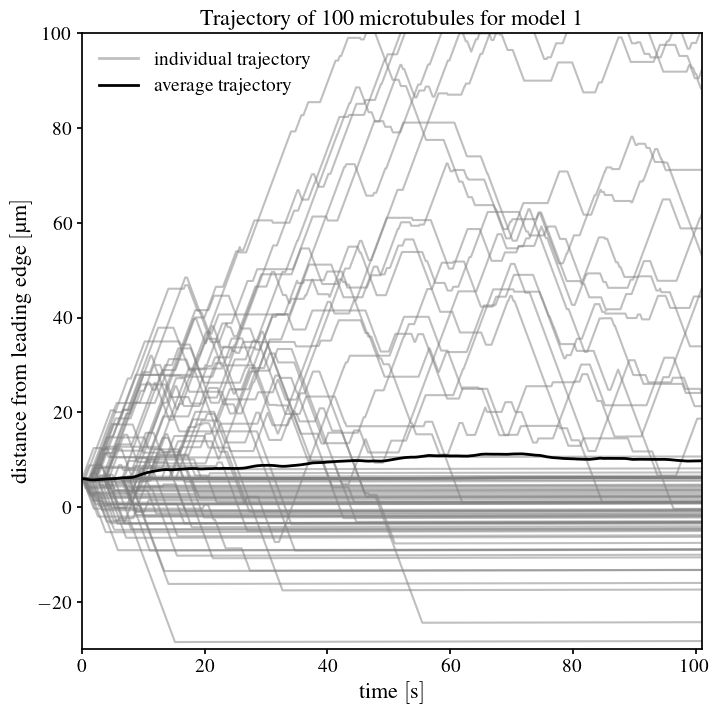

In [57]:
# plot the trajectory of each MT
fig, ax = plt.subplots()

# plot each MT
for mt_i in range(m1_mts.shape[2]):
    # extract time and position array
    time = m1_mts[:, 0, mt_i]
    position = m1_mts[:, 1, mt_i]

    # plot the MT with half transparency
    ax.plot(time, position, alpha=0.5, color="gray")

# plot the average position at each time
average_position = np.mean(m1_mts[:, 1, :], axis=1)
ax.plot(
    m1_mts[:, 0, 0],
    average_position,
    color="black",
    linewidth=2
)

# limit the y-axis
ax.set_ylim(-30, 100)

# label axis and title
ax.set_xlabel(r"time $\left[\qty{}{\second}\right]$")
ax.set_ylabel(r"distance from leading edge $\left[\qty{}{\micro\meter}\right]$")
ax.set_title(r"Trajectory of 100 microtubules for model 1")

# add a legend
# this needs custom entries, one for the transparent lines and one for the thick line
# they need custom artists too
ax.legend(
    [
        plt.Line2D([0], [0], color="gray", linewidth=2, alpha=0.5),
        plt.Line2D([0], [0], color="black", linewidth=2),
    ],
    [
        "individual trajectory",
        "average trajectory",
    ],
)

# save figure
fig.savefig(figure_dir / "mt_trajectory_m1")

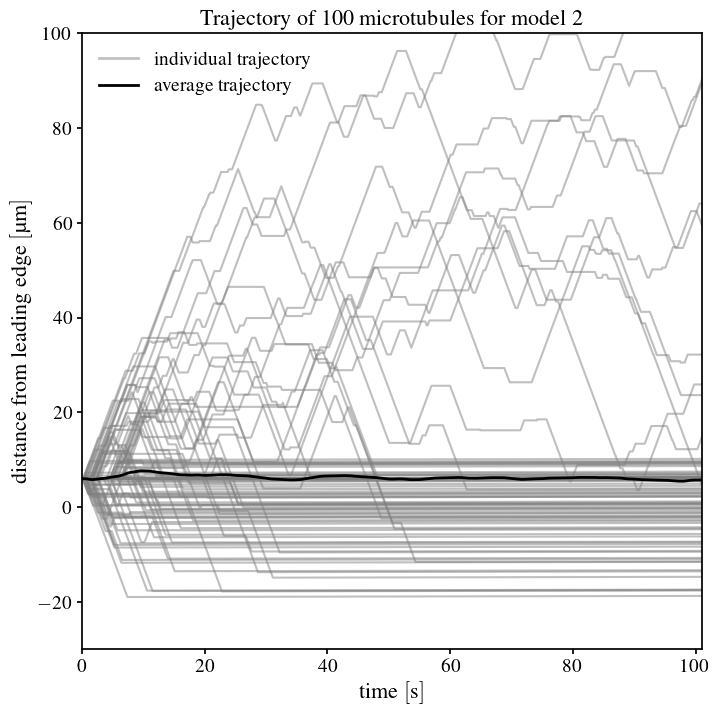

In [58]:
# plot the trajectory of each MT
fig, ax = plt.subplots()

# plot each MT
for mt_i in range(m2_mts.shape[2]):
    # extract time and position array
    time = m2_mts[:, 0, mt_i]
    position = m2_mts[:, 1, mt_i]

    # plot the MT with half transparency
    ax.plot(time, position, alpha=0.5, color="gray")

# plot the average position at each time
average_position = np.mean(m2_mts[:, 1, :], axis=1)
ax.plot(
    m2_mts[:, 0, 0],
    average_position,
    color="black",
    linewidth=2
)

# limit the y-axis
ax.set_ylim(-30, 100)

# label axis and title
ax.set_xlabel(r"time $\left[\qty{}{\second}\right]$")
ax.set_ylabel(r"distance from leading edge $\left[\qty{}{\micro\meter}\right]$")
ax.set_title(r"Trajectory of 100 microtubules for model 2")

# add a legend
# this needs custom entries, one for the transparent lines and one for the thick line
# they need custom artists too
ax.legend(
    [
        plt.Line2D([0], [0], color="gray", linewidth=2, alpha=0.5),
        plt.Line2D([0], [0], color="black", linewidth=2),
    ],
    [
        "individual trajectory",
        "average trajectory",
    ],
)

# save figure
fig.savefig(figure_dir / "mt_trajectory_m2")

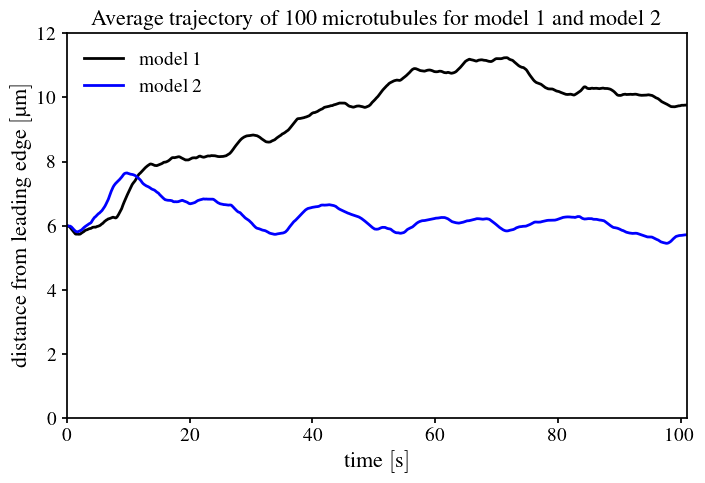

In [73]:
# make a short figure showing just the average line for m1 and m2
# decrease the height of the figure
fig, ax = plt.subplots(figsize=(8,5))

# plot the average position at each time
average_position_m1 = np.mean(m1_mts[:, 1, :], axis=1)
average_position_m2 = np.mean(m2_mts[:, 1, :], axis=1)

ax.plot(
    m1_mts[:, 0, 0],
    average_position_m1,
    color="black",
    linewidth=2,
    label="model 1"
)

ax.plot(
    m2_mts[:, 0, 0],
    average_position_m2,
    color="blue",
    linewidth=2,
    label="model 2"
)

# limit the y-axis
ax.set_ylim(0, 12)

# label axis and title
ax.set_xlabel(r"time $\left[\qty{}{\second}\right]$")
ax.set_ylabel(r"distance from leading edge $\left[\qty{}{\micro\meter}\right]$")
ax.set_title(r"Average trajectory of 100 microtubules for model 1 and model 2")

# add a legend in the upper left
ax.legend(loc="upper left")

# save figure
fig.savefig(figure_dir / "mt_trajectory_average_closeup")

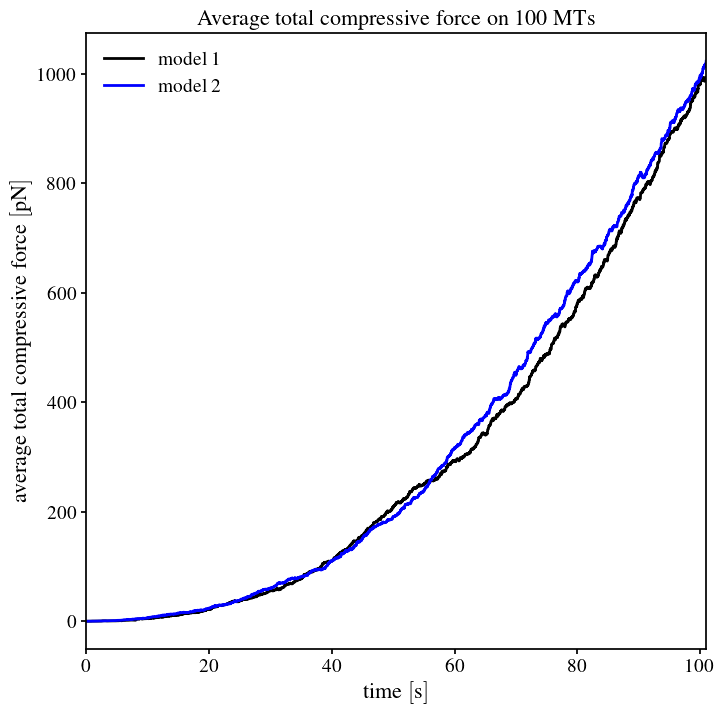

In [74]:
# plot the average compressive force at each time
fig, ax = plt.subplots()

# extract arrays
time = m1_mts[:, 0, 0]

# for m1
plus_force_m1 = m1_mts[:, 3, :]
minus_force_m1 = m1_mts[:, 4, :]
compressive_force_m1 = np.abs(plus_force_m1) + np.abs(minus_force_m1)

# for m2
plus_force_m2 = m2_mts[:, 3, :]
minus_force_m2 = m2_mts[:, 4, :]
compressive_force_m2 = np.abs(plus_force_m2) + np.abs(minus_force_m2)

# calculate the average compressive force at each time
average_compressive_force_m1 = np.mean(compressive_force_m1, axis=1)
average_compressive_force_m2 = np.mean(compressive_force_m2, axis=1)

# plot the average compressive force at each time
ax.plot(
    time,
    average_compressive_force_m1,
    color="black",
    linewidth=2,
    label="model 1"
)
ax.plot(
    time,
    average_compressive_force_m2,
    color="blue",
    linewidth=2,
    label="model 2"
)

# label axis and title
ax.set_xlabel(r"time $\left[\qty{}{\second}\right]$")
ax.set_ylabel(r"average total compressive force $\left[\qty{}{\pico\newton}\right]$")
ax.set_title(r"Average total compressive force on 100 MTs")

# add a legend
ax.legend()

# save figure
fig.savefig(figure_dir / "average_compressive_force")